In [2]:
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib

%matplotlib inline

In [6]:
cleaned_data_location = 'data/gapminder_cleaned.csv'
df = pd.read_csv(cleaned_data_location)
df.head()

FileNotFoundError: File b'data/gapminder_cleaned.csv' does not exist

In [8]:
#defensive codeing, for when you get a big error message 
try: 
    df = pd.read_csv(cleaned_data_location)
    
except FileNotFoundError: 
    print("Could not find data file, check path? You tried:", cleaned_data_location)

Could not find data file, check path? You tried: data/gapminder_cleaned.csv


In [9]:
#so this makes it not print out all the lines of "oh god I cant find it" and it'll print what we told it

In [10]:
cleaned_data_location = '../data/gapminder_cleaned.csv'

try: 
    df = pd.read_csv(cleaned_data_location)
    
except FileNotFoundError: 
    print("Could not find data file, check path? You tried:", cleaned_data_location)

In [11]:
# so it didn't print anything, lets create a variable to fix that 

In [12]:
#if a variable is in all caps, then its like a big do not change sign
VERBOSE = True 

cleaned_data_location = '../data/gapminder_cleaned.csv'

try: 
    df = pd.read_csv(cleaned_data_location)
    if VERBOSE:
        print(df.head())
    
except FileNotFoundError: 
    print("Could not find data file, check path? You tried:", cleaned_data_location)

   year       pop  lifeexp   gdppercap      country continent
0  1952   8425333   28.801  779.445314  afghanistan      asia
1  1957   9240934   30.332  820.853030  afghanistan      asia
2  1962  10267083   31.997  853.100710  afghanistan      asia
3  1967  11537966   34.020  836.197138  afghanistan      asia
4  1972  13079460   36.088  739.981106  afghanistan      asia


In [13]:
#so now since verbose was true, it printed the data :) yay

In [14]:
#if you want it to do nothing, simply change your verbose to false 
VERBOSE = False 

cleaned_data_location = '../data/gapminder_cleaned.csv'

try: 
    df = pd.read_csv(cleaned_data_location)
    if VERBOSE:
        print(df.head())
    
except FileNotFoundError: 
    print("Could not find data file, check path? You tried:", cleaned_data_location)

In [15]:
#but now lets work with it
VERBOSE = True 

cleaned_data_location = '../data/gapminder_cleaned.csv'

try: 
    df = pd.read_csv(cleaned_data_location)
    if VERBOSE:
        print(df.head())
    
except FileNotFoundError: 
    print("Could not find data file, check path? You tried:", cleaned_data_location)

   year       pop  lifeexp   gdppercap      country continent
0  1952   8425333   28.801  779.445314  afghanistan      asia
1  1957   9240934   30.332  820.853030  afghanistan      asia
2  1962  10267083   31.997  853.100710  afghanistan      asia
3  1967  11537966   34.020  836.197138  afghanistan      asia
4  1972  13079460   36.088  739.981106  afghanistan      asia


In [19]:
years = df['year'].unique()
years.sort()
assert years[-1] == 2007

#this says look at the last thing in the list and blow up if its not 2007
#the idea is that we know from out data that we only have information up form 2007, 
# we can use assert to make sure thats true to make sure our data is good 

In [22]:
#you can break it down line by line to see how assert works 

In [23]:
#so what are our years
years

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [24]:
#lets sort them in order
years.sort()

In [26]:
#so the last one in the list should be 2007
years[-1]

2007

In [30]:
#so now we want to assert, or prove that through the whole data set, that the last year is 2007
assert years[-1] == 2007

In [31]:
#if you wanted it to throw up an error message 
assert years[-1] == 2005, 'wrong'

AssertionError: wrong

In [32]:
mask_asia = df['continent'] == 'asia'
#this is saying, show me the set of rows where the continent is asia
df_asia = df[mask_asia]
#this puts it in a new data set with only asia 

mask_1952 = df_asia['year'] == 1952
df_1952 = df_asia[mask_1952]
#now we have all the countries in asia in 1952  

value = np.mean(df_1952['lifeexp'])
#so now this calulates the life expectancy for the continent of asia in 1952 

result = []
#we created an empty list

result.append(('asia','1952', value))
# append a row to the result list with a tuple containing the result 

result_df = pd.DataFrame(result, columns=['continent', 'year', 'lifeexp'])
# turn the summary into a data frame so we can easily visualize it

result_df


,continent,year,lifeexp
0,asia,1952,46.314394


In [36]:
# what if we wanted it for every year and not just 1952
mask_asia = df['continent'] == 'asia'
df_asia = df[mask_asia]

years = df_asia['year'].unique()
summary =[]

for year in years: 
    mask_year = df_asia['year'] == year
    df_year = df_asia[mask_year]
    value = np.mean(df_year['lifeexp'])
    summary.append(['asia', year, value])
    
assert len(summary) == 12

result_df = pd.DataFrame(summary, columns=['continent', 'year', 'lifeexp'])
# turn the summary into a data frame so we can easily visualize it

result_df

,continent,year,lifeexp
0,asia,1952,46.314394
1,asia,1957,49.318544
2,asia,1962,51.563223
3,asia,1967,54.663640
4,asia,1972,57.319269
5,asia,1977,59.610556
6,asia,1982,62.617939
7,asia,1987,64.851182
8,asia,1992,66.537212
9,asia,1997,68.020515


In [43]:
# Calculate mean life expantancy for contient by all years
#so we can change the asia and lifeexp to catagories in the code so that now whenever we want to change anything 
#we can just type it at the top and it'll change
category = 'lifeexp'
continent = 'asia'


mask_continent = df['continent'] == continent
df_continent = df[mask_continent]

years = df_continent['year'].unique()
summary =[]

for year in years: 
    mask_year = df_continent['year'] == year
    df_year = df_continent[mask_year]
    value = np.mean(df_year[category])
    summary.append([continent, year, value])
    
assert len(summary) == 12

result_df = pd.DataFrame(summary, columns=['continent', 'year', category])
# turn the summary into a data frame so we can easily visualize it

result_df

,continent,year,lifeexp
0,asia,1952,46.314394
1,asia,1957,49.318544
2,asia,1962,51.563223
3,asia,1967,54.663640
4,asia,1972,57.319269
5,asia,1977,59.610556
6,asia,1982,62.617939
7,asia,1987,64.851182
8,asia,1992,66.537212
9,asia,1997,68.020515


In [41]:
# Calculate mean life expantancy for contient by all years
category = 'lifeexp'
continent = 'americas'


mask_continent = df['continent'] == continent
df_continent = df[mask_continent]

years = df_continent['year'].unique()
summary =[]

for year in years: 
    mask_year = df_continent['year'] == year
    df_year = df_continent[mask_year]
    value = np.mean(df_year[category])
    summary.append([continent, year, value])
    
assert len(summary) == 12

result_df = pd.DataFrame(summary, columns=['continent', 'year', category])
# turn the summary into a data frame so we can easily visualize it

result_df

,continent,year,lifeexp
0,americas,1952,53.27984
1,americas,1957,55.96028
2,americas,1962,58.39876
3,americas,1967,60.41092
4,americas,1972,62.39492
5,americas,1977,64.39156
6,americas,1982,66.22884
7,americas,1987,68.09072
8,americas,1992,69.56836
9,americas,1997,71.15048


In [40]:
# Calculate mean life expantancy for contient by all years
category = 'pop'
continent = 'asia'


mask_continent = df['continent'] == continent
df_continent = df[mask_continent]

years = df_continent['year'].unique()
summary =[]

for year in years: 
    mask_year = df_continent['year'] == year
    df_year = df_continent[mask_year]
    value = np.mean(df_year[category])
    summary.append([continent, year, value])
    
assert len(summary) == 12

result_df = pd.DataFrame(summary, columns=['continent', 'year', category])
# turn the summary into a data frame so we can easily visualize it

result_df

,continent,year,pop
0,asia,1952,4.228356e+07
1,asia,1957,4.735699e+07
2,asia,1962,5.140476e+07
3,asia,1967,5.774736e+07
4,asia,1972,6.518098e+07
5,asia,1977,7.225799e+07
6,asia,1982,7.909502e+07
7,asia,1987,8.700669e+07
8,asia,1992,9.494825e+07
9,asia,1997,1.025238e+08


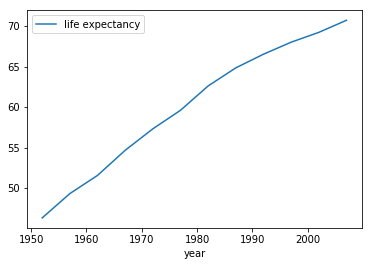

In [44]:
result_df.plot.line('year',category, label = 'life expectancy')

In [45]:
#so now we want to automate this so we dont have to copy paste every time
#lets make a function 
#verbose is a varible in our function that we can set as a constant 

def calculate_mean_over_time(data, category, continent, verbose=False):
    #calculate mean category for continent by all years 
    
    mask_continent = data['continent'] == continent
    df_continent = data[mask_continent]

    years = df_continent['year'].unique()
    summary =[]

    for year in years: 
        if verbose: 
            print(year)
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = np.mean(df_year[category])
        summary.append([continent, year, value])

    assert len(summary) == 12

    # turn the summary into a data frame so we can easily visualize it
    result_df = pd.DataFrame(summary, columns=['continent', 'year', category])
    return result_df

In [46]:
calculate_mean_over_time(df, 'lifeexp', 'asia')

,continent,year,lifeexp
0,asia,1952,46.314394
1,asia,1957,49.318544
2,asia,1962,51.563223
3,asia,1967,54.663640
4,asia,1972,57.319269
5,asia,1977,59.610556
6,asia,1982,62.617939
7,asia,1987,64.851182
8,asia,1992,66.537212
9,asia,1997,68.020515


In [47]:
#so we ran that without the verbose variable, what would it look like if we added it in
calculate_mean_over_time(df, 'lifeexp', 'asia', True)

1952
1957
1962
1967
1972
1977
1982
1987
1992
1997
2002
2007


,continent,year,lifeexp
0,asia,1952,46.314394
1,asia,1957,49.318544
2,asia,1962,51.563223
3,asia,1967,54.663640
4,asia,1972,57.319269
5,asia,1977,59.610556
6,asia,1982,62.617939
7,asia,1987,64.851182
8,asia,1992,66.537212
9,asia,1997,68.020515


In [ ]:
#Lets label some shit 

def calculate_mean_over_time(data, category, continent, verbose=False):
    #calculate mean category for continent by all years 
    
    #create a mask that selects the continent of choice
    mask_continent = data['continent'] == continent
    df_continent = data[mask_continent]
    
    #loop over the years and calculate the statistics of interest into summary list variable 
    years = df_continent['year'].unique()
    summary =[]

    for year in years: 
        if verbose: 
            print(year)
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = np.mean(df_year[category])
        summary.append([continent, year, value])
        
    #there should be 12 records for each continent 
    assert len(summary) == 12

    # turn the summary into a data frame so we can easily visualize it
    result_df = pd.DataFrame(summary, columns=['continent', 'year', category])
    return result_df

In [53]:
# now we want to write the function so that its not calculating mean over time but any statistic over time

def calculate_statistic_over_time(data, category, continent, func): 
    
    #create a mask that selects the continent of choice
    mask_continent = data['continent'] == continent
    df_continent = data[mask_continent]

    years = df_continent['year'].unique()
    summary =[]
    
    #change value from [value = np.mean], to [value = func], so that the func is now whatever 
    #you want to add when you run the function 
    for year in years: 
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = func(df_year[category])
        summary.append([continent, year, value])

    assert len(summary) == 12

    # turn the summary into a data frame so we can easily visualize it
    result_df = pd.DataFrame(summary, columns=['continent', 'year', category])
    return result_df

#okie lets try it
calculate_statistic_over_time(df, 'lifeexp', 'asia', np.mean) #now we have to write np.mean because we want the mean

,continent,year,lifeexp
0,asia,1952,46.314394
1,asia,1957,49.318544
2,asia,1962,51.563223
3,asia,1967,54.663640
4,asia,1972,57.319269
5,asia,1977,59.610556
6,asia,1982,62.617939
7,asia,1987,64.851182
8,asia,1992,66.537212
9,asia,1997,68.020515


In [55]:
#so now we can do 
calculate_statistic_over_time(df, 'lifeexp', 'asia', np.median)

,continent,year,lifeexp
0,asia,1952,44.869
1,asia,1957,48.284
2,asia,1962,49.325
3,asia,1967,53.655
4,asia,1972,56.950
5,asia,1977,60.765
6,asia,1982,63.739
7,asia,1987,66.295
8,asia,1992,68.690
9,asia,1997,70.265


In [62]:
#or maybe 
calculate_statistic_over_time(df, 'lifeexp', 'asia', np.mode)

AttributeError: module 'numpy' has no attribute 'mode'

In [63]:
#haha no so, np doesnt have a mode function, so I would need to find a package that did if i wanted to run that

In [66]:
calculate_statistic_over_time(df, 'pop', 'americas', np.median) #so now I can do any parameter, 
#any continent, and any statistic

,continent,year,pop
0,americas,1952,3146381.0
1,americas,1957,3507701.0
2,americas,1962,3880130.0
3,americas,1967,4318137.0
4,americas,1972,4698301.0
5,americas,1977,5302800.0
6,americas,1982,5968349.0
7,americas,1987,6655297.0
8,americas,1992,7351181.0
9,americas,1997,7992357.0


In [67]:
#okie so in our code everything is well labeled, but to better organize and label we should add a doc string 

def calculate_statistic_over_time(data, category, continent, func): 
    """Calculate values of a statistic through time 
    
    Args: 
        data: a data frame 
        category: one of the columns headers of the data frame (e.g. 'lifeexp')
        continent: possible value of continent column in that data frame (e.g. 'asia')
        func: the function to apply to data values (e.g. np.mean)
        
    Returns: 
        a summary table of value per year. 
        
    """
    #create a mask that selects the continent of choice
    mask_continent = data['continent'] == continent
    df_continent = data[mask_continent]

    years = df_continent['year'].unique()
    summary =[]
    
    #change value from [value = np.mean], to [value = func], so that the func is now whatever 
    #you want to add when you run the function 
    for year in years: 
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = func(df_year[category])
        summary.append([continent, year, value])

    assert len(summary) == 12

    # turn the summary into a data frame so we can easily visualize it
    result_df = pd.DataFrame(summary, columns=['continent', 'year', category])
    return result_df

In [68]:
#so now when we ask for help on our function it should give us our doc string back 
help(calculate_statistic_over_time)

Help on function calculate_statistic_over_time in module __main__:

calculate_statistic_over_time(data, category, continent, func)
    Calculate values of a statistic through time 
    
    Args: 
        data: a data frame 
        category: one of the columns headers of the data frame (e.g. 'lifeexp')
        continent: possible value of continent column in that data frame (e.g. 'asia')
        func: the function to apply to data values (e.g. np.mean)
        
    Returns: 
        a summary table of value per year.



In [69]:
#how about we reintroduce the verbose and add in some defensive programing 

def calculate_statistic_over_time(data, category, continent, func, verbose=True): 
    """Calculate values of a statistic through time 
    
    Args: 
        data: a data frame 
        category: one of the columns headers of the data frame (e.g. 'lifeexp')
        continent: possible value of continent column in that data frame (e.g. 'asia')
        func: the function to apply to data values (e.g. np.mean)
        
    Returns: 
        a summary table of value per year. 
        
    """
    #check the values 
    assert category in data.columns.values, 'Category must be one of the data frame columns'
    assert 'continent' in data.columns.values, 'Continent column not found in data frame'
    assert continent in data['continent'].unique(), 'Continent value not found in data frame'
    
    #create a mask that selects the continent of choice
    mask_continent = data['continent'] == continent
    df_continent = data[mask_continent]

    years = df_continent['year'].unique()
    summary =[]
    
    #change value from [value = np.mean], to [value = func], so that the func is now whatever 
    #you want to add when you run the function 
    for year in years: 
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = func(df_year[category])
        summary.append([continent, year, value])

    assert len(summary) == 12

    # turn the summary into a data frame so we can easily visualize it
    result_df = pd.DataFrame(summary, columns=['continent', 'year', category])
    return result_df

In [71]:
#so now 
calculate_statistic_over_time(df, 'lifeexp', 'america', np.median)

AssertionError: Continent value not found in data frame

In [72]:
# now it tells us 'hey thats not a continent'
#try again 

In [73]:
calculate_statistic_over_time(df, 'lifeexp', 'americas', np.median)

,continent,year,lifeexp
0,americas,1952,54.745
1,americas,1957,56.074
2,americas,1962,58.299
3,americas,1967,60.523
4,americas,1972,63.441
5,americas,1977,66.353
6,americas,1982,67.405
7,americas,1987,69.498
8,americas,1992,69.862
9,americas,1997,72.146


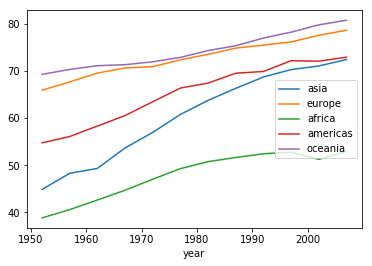

In [79]:
#plot life expectancy over time for all continents
continent = df['continent'].unique()
category = 'lifeexp'
fig, ax = plt.subplots()

for continent in continent: 
    func = np.median
    output = calculate_statistic_over_time(df, category, continent, func)
    output.plot.line('year', 'lifeexp', ax=ax, label=continent)
    